In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from labs import *
from statistics import stdev

In [51]:
x1 = Value(17.05, 0.01)
y1 = Value(288, 0.2)
x2 = Value(18.5, 0.01)
y2 = Value(309, 0.2)

In [52]:
m = pd.read_csv("dataset1.csv")
m["tau"] = m["Time"].agg(lambda s: 60 * 60 * int(s[:2]) + 60 * int(s[5:7]) + int(s[10:12]))
m = m.drop(["Time", "Value_2ND", """DateTime : ( 23 / 02 / 06 -- 14 : 44 : 21 )""", " "], axis=1)
def convert_to_temp(r):
    return (r - x1) * ((y2 - y1) / (x2 - x1)) + y1
m["T1"] = m["Value"].agg(convert_to_temp)

In [53]:
p = pd.read_csv("dataset2.csv")
p["tau"] = p["Time"].agg(lambda s: 60 * 60 * int(s[:2]) + 60 * int(s[5:7]) + int(s[10:12]))
p = p.drop(["Time", "Value_2ND", """DateTime : ( 23 / 02 / 06 -- 14 : 44 : 21 )""", " "], axis=1)
p["T2"] = p["Value"].agg(convert_to_temp)
p = p.loc[p['T2'] < 308]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


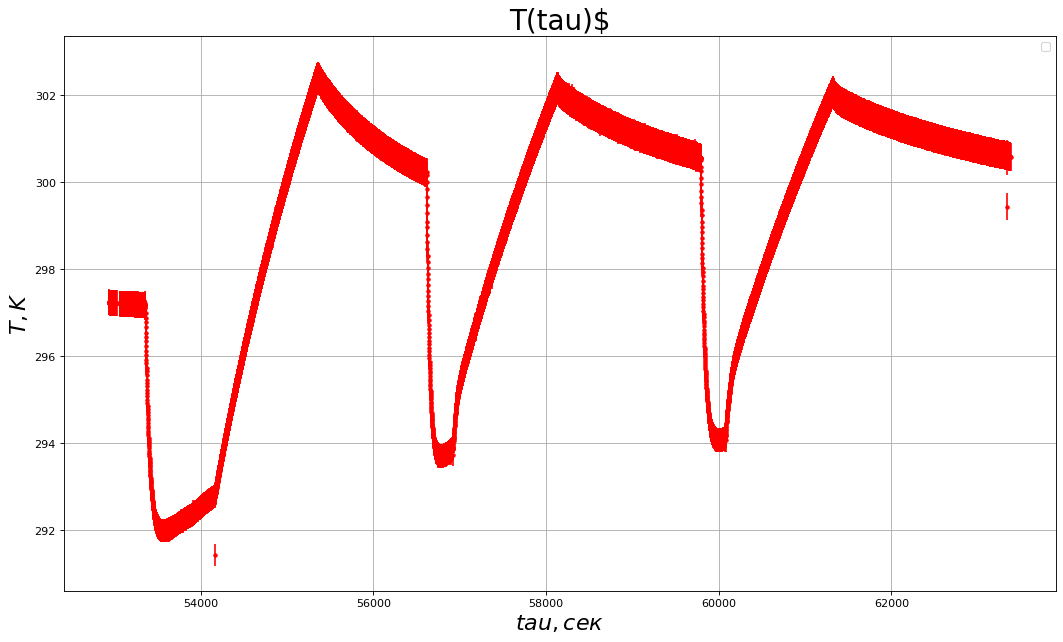

In [55]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=p["tau"].agg(get_var), y=p["T2"].agg(get_var),
                xerr=p["tau"].agg(get_err), yerr=p["T2"].agg(get_err), fmt='.', color="red")
data = 
plt.errorbar(x=p["tau"].agg(get_var), y=p["T2"].agg(get_var),
                xerr=p["tau"].agg(get_err), yerr=p["T2"].agg(get_err), fmt='.', color="blue")
#plt.errorbar(x=m["tau"].agg(get_var), y=m["T1"].agg(get_var), xerr=m["tau"].agg(get_err), yerr=m["T1"].agg(get_err), fmt='.', color="green")

plt.title(r"T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()